In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Train - quick overview  

In [169]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [170]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [171]:
train.describe(include='O')

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Jensen, Mr. Niels Peder  male  347082  B96 B98        S
freq                          1   577       7        4      644

A quick overview can show us a few data:
* sex
* tickets repeated
* embarked S where there is more people

In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can see there are a few missed data:
* Age
* Cabin

In [173]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is 177 missed data from Age, 687 from Cabin and 2 from Embarked

# Test - quick overview 

In [174]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [175]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In test dataset there is 86 missed data from Age, 1 from Fare and 327 from Cabin

# Finding relationships

In [176]:
# relation between sex and survived
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [177]:
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

Sex  Survived
0  female  0.742038
1    male  0.188908

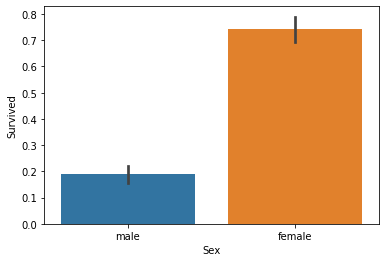

In [178]:
sns.barplot(x='Sex', y='Survived', data=train)

Female as a better chance to survive.

In [179]:
# relation betweeb pclass and survived
train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

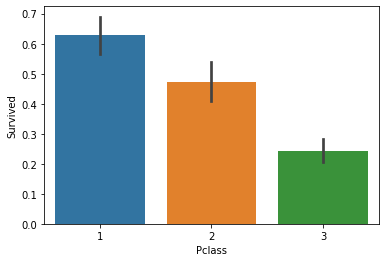

In [180]:
sns.barplot(x='Pclass', y='Survived', data=train)
#train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().plot(kind='bar')

In [181]:
# relation between sex and pclass with survived
train[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass'], as_index=False).mean()

Sex  Pclass  Survived
0  female       1  0.968085
1  female       2  0.921053
2  female       3  0.500000
3    male       1  0.368852
4    male       2  0.157407
5    male       3  0.135447

In [182]:
pd.crosstab(train['Pclass'], [train['Sex'], train['Survived']], margins=True, margins_name='Total')

Sex      female      male      Total
Survived      0    1    0    1      
Pclass                              
1             3   91   77   45   216
2             6   70   91   17   184
3            72   72  300   47   491
Total        81  233  468  109   891

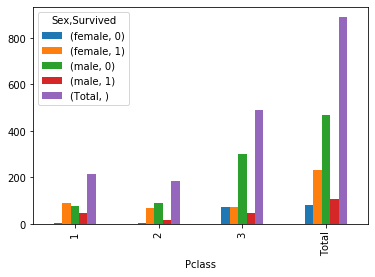

In [183]:
pd.crosstab(train['Pclass'], [train['Sex'], train['Survived']], margins=True, margins_name='Total').plot(kind='bar')

/home/hnko/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


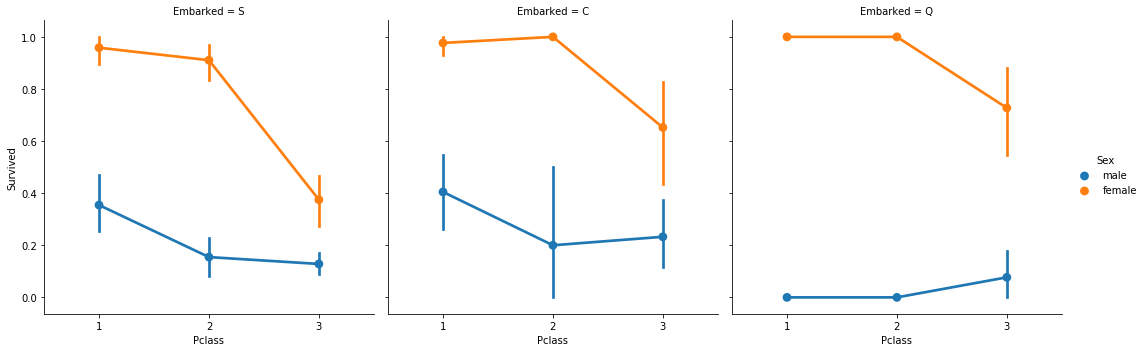

In [184]:
# pclass, sex and embarked with survived
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

Embarked S:
* Pclass 1 and 2 almost all female survive.
* Pclass 3 low percent of male survive.

Embarked C:
* Pclass 1 and 2 almost all female survive.

Embarked Q:
* Pclass 1 and 2 almost all female survive.
* Pclass 1 and 2 almost all male not survive.

/home/hnko/.local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


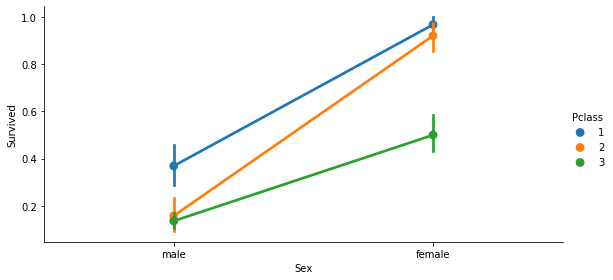

In [185]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

In [186]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [187]:
# people who survive according the embarked type
train[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

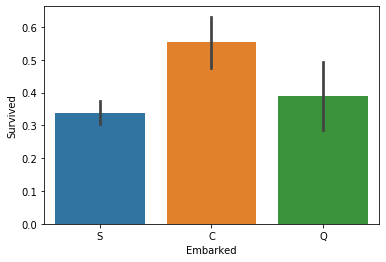

In [188]:
sns.barplot(x='Embarked', y='Survived', data=train)

In [189]:
#parch - The number of parents or children the passenger had aboard the Titanic
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [190]:
train[['Survived', 'Parch']].groupby('Parch', as_index=False).mean()

Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000

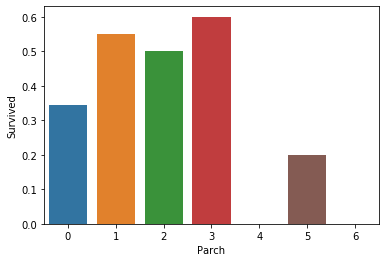

In [191]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train)

We can see that people who have 1 to 3 family is more likely to survive

In [192]:
# sibsp with survived
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [193]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()

SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

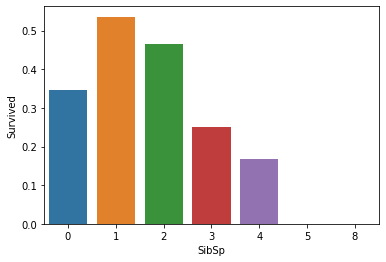

In [194]:
sns.barplot(x='SibSp', y='Survived', ci=None, data=train)

People who has one sibbling has more chances to survive.

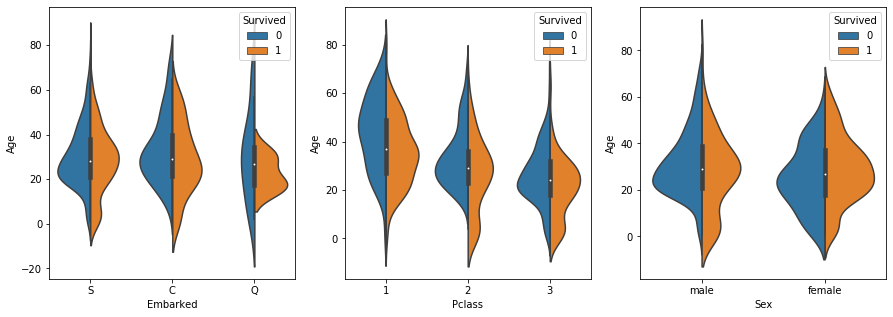

In [195]:
#Age and Survival
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x='Embarked', y='Age', hue='Survived', data=train, split=True, ax=ax1)
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, split=True, ax=ax2)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, split=True, ax=ax3)

Observations:
   * Pclass 1 has less children and more older people than the other Pclasses
   * Children and women have better chance to survive

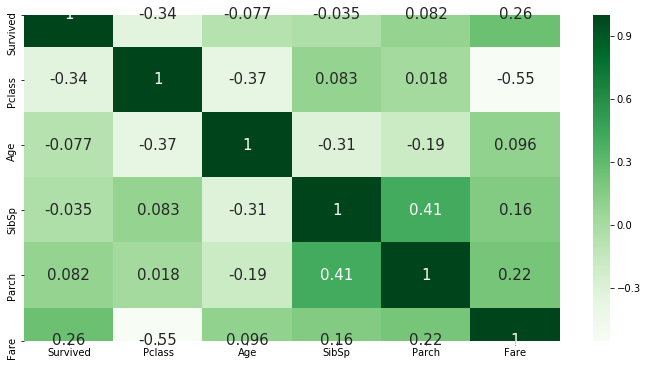

In [196]:
## correlation
plt.figure(figsize=(12,6))
sns.heatmap(train.drop('PassengerId', axis=1).corr(), annot=True, annot_kws={"size": 15}, cmap='Greens')


## Extracting name features

In [197]:
for dataset in [train, test]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [198]:
pd.crosstab(train['Title'], train['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [199]:
for dataset in [train, test]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    
    names = {'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}
    dataset['Title'] = dataset['Title'].map(lambda x: names.get(x, x))

train[['Title', 'Survived']].groupby('Title', as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4   Other  0.347826

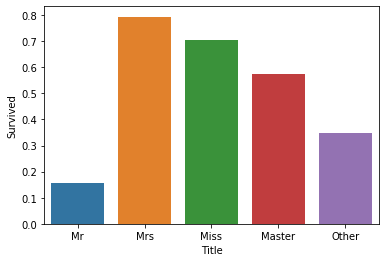

In [200]:
sns.barplot(x='Title', y='Survived', data=train, ci=None)

In [201]:
#mapping titles
title_mapping = dict(zip(train.Title.unique(), list(range(1, 6))))

for dataset in [train, test]:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [202]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      1  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      3  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      1

In [203]:
#mapping sex
sex_mapping = {'male': 0, 'female': 1}

for dataset in [train, test]:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping).astype(int)

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      1  
1          PC 17599  71.2833   C85        C      2  
2  STON/O2. 3101282   7.9250   NaN        S      3  
3            113803  53.1000  C123        S      2  
4            373450   8.0500   NaN        S      1

In [204]:
#mapping embarked - check first null values
train.Embarked.isnull().any()

True

In [205]:
train[train.Embarked.isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

     Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Title  
61     1  38.0      0      0  113572  80.0   B28      NaN      3  
829    1  62.0      0      0  113572  80.0   B28      NaN      2

In [206]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [207]:
# filling with the highest and mapping
embarked_mapping = {'S': 0, 'C':1, 'Q':2}
for dataset in [train, test]:
    dataset['Embarked'] = dataset['Embarked'].fillna('S').map(embarked_mapping).astype(int)
    
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  Title  
0         A/5 21171   7.2500   NaN         0      1  
1          PC 17599  71.2833   C85         1      2  
2  STON/O2. 3101282   7.9250   NaN         0      3  
3            113803  53.1000  C123         0      2  
4            373450   8.0500   NaN         0      1

In [208]:
#Processing Age
for dataset in [train, test]:
    mean, std = dataset['Age'].mean(), dataset['Age'].std()
    null_values = dataset['Age'].isnull().sum()
    
    ages_random = np.random.randint(mean-std, mean+std, null_values)
    
    dataset['Age'][np.isnan(dataset['Age'])] = ages_random
    dataset['Age'] = dataset['Age'].astype(int)

train.Age.isnull().any()

/home/hnko/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False

In [209]:
#creating bands age
train['AgeBand'] = pd.cut(train['Age'].values, 8)
train[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean()

AgeBand  Survived
0  (-0.08, 10.0]  0.593750
1   (10.0, 20.0]  0.345912
2   (20.0, 30.0]  0.357143
3   (30.0, 40.0]  0.402844
4   (40.0, 50.0]  0.373737
5   (50.0, 60.0]  0.404762
6   (60.0, 70.0]  0.222222
7   (70.0, 80.0]  0.250000

In [210]:
pd.crosstab(train.AgeBand, [train.Survived, train.Sex], margins=True)

Survived         0        1       All
Sex              0   1    0    1     
AgeBand                              
(-0.08, 10.0]   14  12   19   19   64
(10.0, 20.0]    88  16   12   43  159
(20.0, 30.0]   160  29   30   75  294
(30.0, 40.0]   115  11   29   56  211
(40.0, 50.0]    50  12   13   24   99
(50.0, 60.0]    24   1    4   13   42
(60.0, 70.0]    14   0    1    3   18
(70.0, 80.0]     3   0    1    0    4
All            468  81  109  233  891

In [211]:
# mapping 1 to 8 for each band age
band = list(range(0, 90, 10))
for dataset in [train, test]:
    i = 1
    for pre, curr in zip(band[:], band[1:]):
        dataset.loc[(dataset['Age'] > pre) & (dataset['Age'] <= curr), 'Age'] = i
        i += 1
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0    3      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1    4      1      0   
2                             Heikkinen, Miss. Laina    1    3      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1    4      1      0   
4                           Allen, Mr. William Henry    0    4      0      0   

             Ticket     Fare Cabin  Embarked  Title       AgeBand  
0         A/5 21171   7.2500   NaN         0      1  (20.0, 30.0]  
1          PC 17599  71.2833   C85         1      2  (30.0, 40.0]  
2  STON/O2. 3101282   7.9250   NaN         0      3  (20.0, 30.0]  
3            113803  53.1000  C123         0      2  (30.0, 40.0]  
4            373450   8.0500   NaN         0      1  (30.0, 40.0]

In [212]:
#fill missing fare data with the median
for dataset in [train, test]:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

In [213]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean()

FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

We can see that if you pay more you have better chances to survive

In [214]:
#mapping fare band
fare_band = [-1, 7.91, 14.45, 31.0, 513]
for dataset in [train, test]:
    i = 1
    for pre, curr in zip(fare_band[:], fare_band[1:]):
        dataset.loc[(dataset['Fare'] > pre) & (dataset['Fare'] <= curr), 'Fare' ] = i
        i += 1
    dataset['Fare'] = dataset['Fare'].astype(int)

In [215]:
train.Fare.value_counts()

3    229
1    223
4    222
2    217
Name: Fare, dtype: int64

In [216]:
#sibsp and parch feature
for dataset in [train, test]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean()

FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000

People who has a family size between 2 and 4 has better chances to survive 

In [217]:
#isAlone?
for dataset in [train, test]:
    dataset['IsAlone'] = dataset['FamilySize'].map(lambda x: 1 if x == 1 else 0)

train[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean()

IsAlone  Survived
0        0  0.505650
1        1  0.303538

We can see that a person who is alone has lower changes to survive.

In [218]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'AgeBand',
       'FareBand', 'FamilySize', 'IsAlone'],
      dtype='object')

In [219]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [220]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'IsAlone'],
      dtype='object')

In [221]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('PassengerId', axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [222]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [223]:
moduls = [LogisticRegression(), SVC(), LinearSVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),
         GaussianNB(), Perceptron(), SGDClassifier()]
names = ['LogisticRegression', 'SVC', 'LinearSVC', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier',
         'GaussianNB', 'Perceptron', 'SGDClassifier']
results = [0]*9
for i, model in enumerate(moduls):
    pred = model.fit(X_train, y_train)
    results[i] = pred.score(X_train, y_train)

/home/hnko/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hnko/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hnko/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/hnko/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [224]:
sorted(list(zip(names, results)), key=lambda x: -x[1])

[('DecisionTreeClassifier', 0.8978675645342312),
 ('RandomForestClassifier', 0.8945005611672279),
 ('KNeighborsClassifier', 0.8619528619528619),
 ('SVC', 0.835016835016835),
 ('LinearSVC', 0.8114478114478114),
 ('LogisticRegression', 0.8080808080808081),
 ('GaussianNB', 0.8002244668911336),
 ('SGDClassifier', 0.77665544332211),
 ('Perceptron', 0.7575757575757576)]

In [104]:
model_selected = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model_selected.predict(X_test)

In [105]:
submission = pd.DataFrame({
        'PassengerId': test['PassengerId'],
        'Survived' : y_pred
})

In [106]:
submission.to_csv('submission.csv', index=False)

In [107]:
!kaggle competitions submit -c titanic -f submission.csv -m 'DecisionTreeClassifier'

100%|████████████████████████████████████████| 2.77k/2.77k [00:06<00:00, 439B/s]
Successfully submitted to Titanic: Machine Learning from Disaster

In [108]:
!kaggle competitions submissions -c titanic

fileName        date                 description             status    publicScore  privateScore  
--------------  -------------------  ----------------------  --------  -----------  ------------  
submission.csv  2019-08-26 11:58:56  DecisionTreeClassifier  complete  0.74641      None          
submission.csv  2019-08-26 11:57:09  RandomForestClassifier  complete  0.77990      None          
submission.csv  2019-08-26 11:55:41  SVC                     complete  0.78468      None          
submission.csv  2019-08-26 11:52:42  DecisionTreeClassifier  complete  0.74162      None          


In [225]:
model_selected = SVC().fit(X_train, y_train)
y_pred = model_selected.predict(X_test)

/home/hnko/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [226]:
submission = pd.DataFrame({
        'PassengerId': test['PassengerId'],
        'Survived' : y_pred
})
submission.to_csv('submission.csv', index=False)

In [227]:
!kaggle competitions submit -c titanic -f submission.csv -m 'SVC'

100%|████████████████████████████████████████| 2.77k/2.77k [00:06<00:00, 464B/s]
Successfully submitted to Titanic: Machine Learning from Disaster

In [228]:
!kaggle competitions submissions -c titanic

fileName        date                 description             status    publicScore  privateScore  
--------------  -------------------  ----------------------  --------  -----------  ------------  
submission.csv  2019-08-26 12:04:36  SVC                     complete  0.78468      None          
submission.csv  2019-08-26 11:58:56  DecisionTreeClassifier  complete  0.74641      None          
submission.csv  2019-08-26 11:57:09  RandomForestClassifier  complete  0.77990      None          
submission.csv  2019-08-26 11:55:41  SVC                     complete  0.78468      None          
submission.csv  2019-08-26 11:52:42  DecisionTreeClassifier  complete  0.74162      None          


In [99]:
model_selected = RandomForestClassifier().fit(X_train, y_train)
y_pred = model_selected.predict(X_test)

/home/hnko/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [100]:
submission = pd.DataFrame({
        'PassengerId': test['PassengerId'],
        'Survived' : y_pred
})
submission.to_csv('submission.csv', index=False)

In [101]:
!kaggle competitions submit -c titanic -f submission.csv -m 'RandomForestClassifier'

100%|████████████████████████████████████████| 2.77k/2.77k [00:03<00:00, 893B/s]
Successfully submitted to Titanic: Machine Learning from Disaster

In [103]:
!kaggle competitions submissions -c titanic

fileName        date                 description             status    publicScore  privateScore  
--------------  -------------------  ----------------------  --------  -----------  ------------  
submission.csv  2019-08-26 11:57:09  RandomForestClassifier  complete  0.77990      None          
submission.csv  2019-08-26 11:55:41  SVC                     complete  0.78468      None          
submission.csv  2019-08-26 11:52:42  DecisionTreeClassifier  complete  0.74162      None          
